<a href="https://colab.research.google.com/github/suyash1574/GEN-AI-Workshop/blob/main/src/day1/notebooks/04_image_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 1: Image Pipeline - Your First Computer Vision Model

Welcome to computer vision! After mastering text processing, let's explore how neural networks "see" and understand images.

## 🎯 Learning Objectives
By the end of this notebook, you will:
- Understand how images become numbers for neural networks
- Load and use pre-trained computer vision models
- Explore image preprocessing and transformations
- Build your first image classification pipeline
- Understand CNN concepts through hands-on experimentation
- Apply computer vision to real-world problems

## 📚 Research Focus
This notebook emphasizes **discovery learning**. You'll:
1. Research computer vision concepts before implementing
2. Experiment with image transformations and see their effects
3. Compare different model architectures
4. Build understanding through visual exploration

---

## 1. From Images to Numbers

Neural networks work with numbers, but we have images. How do we represent visual information mathematically?

🔍 **RESEARCH TASK 1**:
- How are digital images stored as numbers?
- What are pixels, and how do RGB values work?
- What is the difference between grayscale and color images?
- Why do we need to normalize pixel values for neural networks?

In [19]:
# Import required libraries
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision import models
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import requests
import json
from io import BytesIO
import seaborn as sns

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

print("✅ Libraries imported successfully!")
print(f"PyTorch version: {torch.__version__}")
print(f"OpenCV version: {cv2.__version__}")

✅ Libraries imported successfully!
PyTorch version: 2.6.0+cu124
OpenCV version: 4.12.0


### Understanding Image Data

🔍 **RESEARCH TASK 2**:
- What is the typical shape of an image tensor?
- What does each dimension represent?
- How do image coordinates work (origin, x/y axes)?

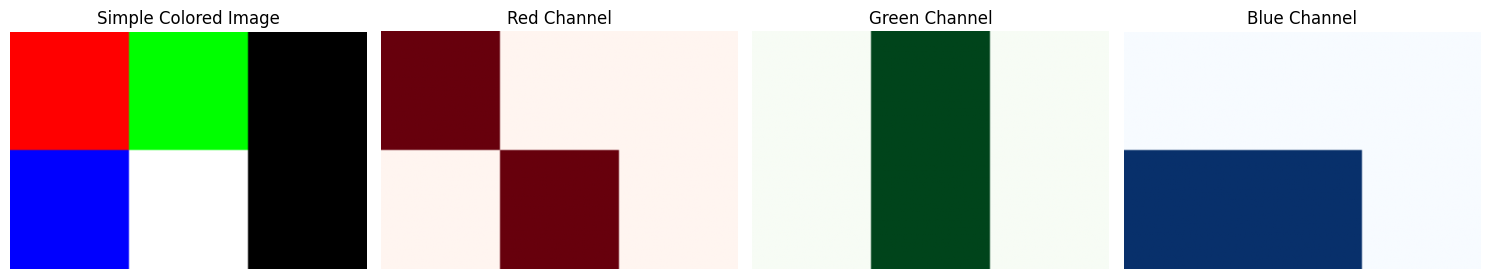

Image shape: (100, 150, 3)
Data type: uint8
Min value: 0
Max value: 255
Memory usage: 45000 bytes


In [20]:
# Create a simple image to understand the data structure
# TODO: Create a simple colored image using numpy
# Hint: Use np.zeros to create a base, then add colors
height, width = 100, 150
simple_image = np.zeros((height, width, 3), dtype=np.uint8)

# TODO: Add some colored regions
# Red square in top-left
simple_image[:50, :50, 0] = 255  # Red channel
# Green square in top-right
simple_image[:50, 50:100, 1] = 255  # Green channel
# Blue square in bottom-left
simple_image[50:, :50, 2] = 255  # Blue channel
# White square in bottom-right
simple_image[50:, 50:100, :] = 255  # All channels

# Visualize and analyze
plt.figure(figsize=(15, 5))

# Original image
plt.subplot(1, 4, 1)
plt.imshow(simple_image)
plt.title('Simple Colored Image')
plt.axis('off')

# TODO: Show individual color channels
channels = ['Red', 'Green', 'Blue']
cmaps    = ['Reds', 'Greens', 'Blues']

for i, (ch, cmap) in enumerate(zip(channels, cmaps)):
    plt.subplot(1, 4, i+2)
    plt.imshow(simple_image[:, :, i], cmap=cmap) # Use the correct channel index
    plt.title(f'{ch} Channel')
    plt.axis('off')


plt.tight_layout()
plt.show()

# TODO: Print image properties
print(f"Image shape: {simple_image.shape}")  # simple_image.shape
print(f"Data type: {simple_image.dtype}")    # simple_image.dtype
print(f"Min value: {simple_image.min()}")    # simple_image.min()
print(f"Max value: {simple_image.max()}")    # simple_image.max()
print(f"Memory usage: {simple_image.nbytes} bytes")

### Loading and Preprocessing Real Images

🔍 **RESEARCH TASK 3**:
- What image formats are commonly used (JPEG, PNG, etc.)?
- Why do we need to resize images for neural networks?
- What is image normalization and why is it important?
- Research common image preprocessing techniques

📥 Attempting to load sample image from URL...
⚠️ URL does not point to a direct image file: https://upload.wikimedia.org/wikipedia/commons/thumb/4/47/PNG_transparency_demonstration_1.png/280px-PNG_transparency_demonstration_1.png
⚠️ URL does not point to a direct image file: https://upload.wikimedia.org/wikipedia/commons/thumb/5/50/Vd-Orig.png/256px-Vd-Orig.png

📁 Could not download from sample URLs. Loading local image instead.
✅ Successfully loaded local image: /content/download.jpg


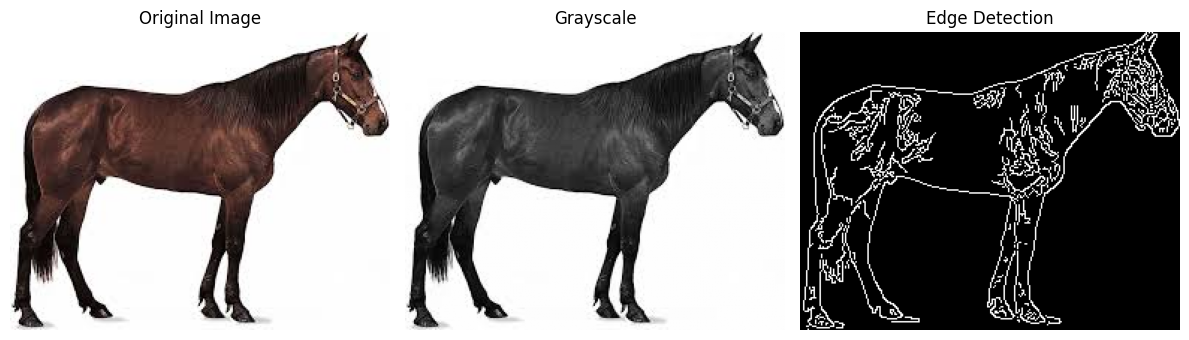

Original shape: (199, 254, 3)
Grayscale shape: (199, 254)
Pixel value range: 0 to 255


In [21]:
# Download a sample image from the internet
def download_image(url, filename):
    """Download an image from URL"""
    try:
        response = requests.get(url)
        # Check if the response content type is an image
        if 'image' in response.headers['content-type']:
            image = Image.open(BytesIO(response.content))
            print(f"✅ Image downloaded successfully from {url}!")
            return image
        else:
            print(f"⚠️ URL does not point to a direct image file: {url}")
            return None
    except Exception as e:
        print(f"Error downloading image from {url}: {e}")
        return None

# Sample image URLs (feel free to replace with your own direct image URLs)
sample_urls = [
    "https://upload.wikimedia.org/wikipedia/commons/thumb/4/47/PNG_transparency_demonstration_1.png/280px-PNG_transparency_demonstration_1.png",
    "https://upload.wikimedia.org/wikipedia/commons/thumb/5/50/Vd-Orig.png/256px-Vd-Orig.png"
]

# TODO: Try to download an image, or load a local sample if download fails
print("📥 Attempting to load sample image from URL...")
sample_image = None
for url in sample_urls:
    sample_image = download_image(url, "sample.png")
    if sample_image:
        break

if sample_image is None:
    print("\n📁 Could not download from sample URLs. Loading local image instead.")
    # Create a placeholder for a local image path
    local_image_path = "/content/download.jpg" # <-- **UPDATE THIS WITH YOUR UPLOADED FILE NAME**

    try:
        # Attempt to load the local image
        sample_image = Image.open(local_image_path).convert("RGB")
        print(f"✅ Successfully loaded local image: {local_image_path}")


# Convert to numpy for analysis
img_array = np.array(sample_image)

# TODO: Display and analyze the image
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(img_array)
plt.title('Original Image')
plt.axis('off')

# TODO: Convert to grayscale
gray_image = cv2.cvtColor(img_array, cv2.COLOR_RGB2GRAY)  # Use cv2.cvtColor(img_array, cv2.COLOR_RGB2GRAY)
plt.subplot(1, 3, 2)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale')
plt.axis('off')

# TODO: Apply edge detection
edges = cv2.Canny(gray_image, 50, 150)  # Use cv2.Canny(gray_image, 50, 150)
plt.subplot(1, 3, 3)
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection')
plt.axis('off')

plt.tight_layout()
plt.show()

# TODO: Print image statistics
print(f"Original shape: {img_array.shape}")  # img_array.shape
print(f"Grayscale shape: {gray_image.shape}")  # gray_image.shape
print(f"Pixel value range: {img_array.min()} to {img_array.max()}")

## 2. Image Transformations and Preprocessing

Before feeding images to neural networks, we need to preprocess them.

🔍 **RESEARCH TASK 4**:
- What is data augmentation and why is it used?
- How do different transformations affect image classification?
- What are the standard ImageNet preprocessing steps?
- Research torchvision.transforms

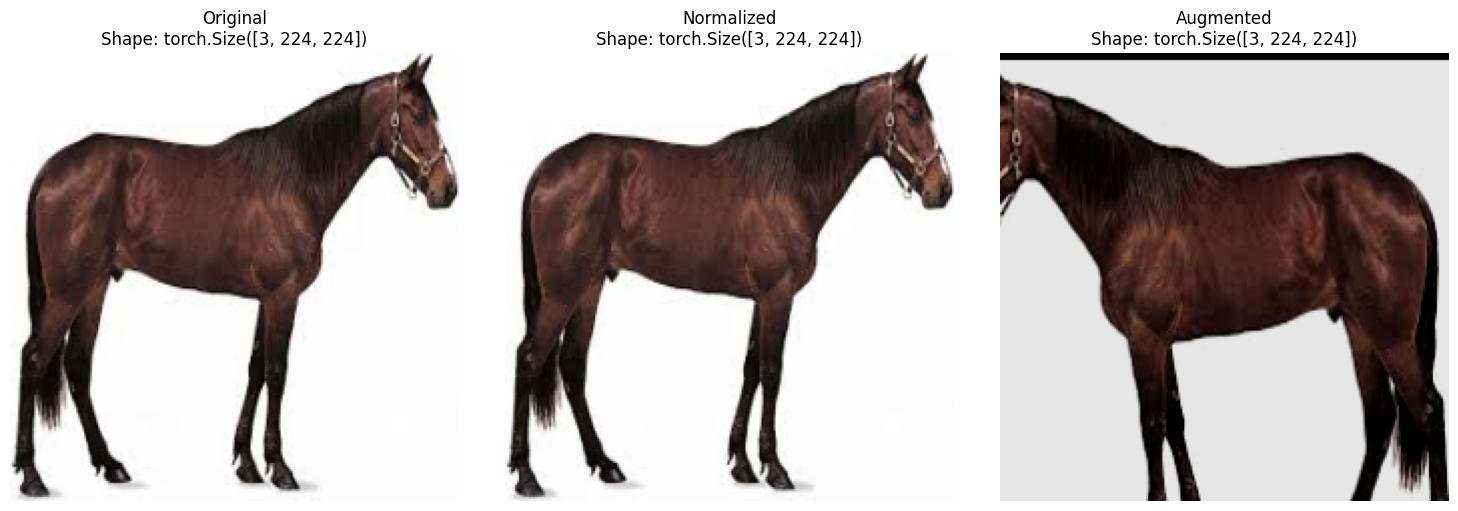

🔍 Transformation Analysis:
Original     - Shape: torch.Size([3, 224, 224]), Range: [0.000, 1.000]
Normalized   - Shape: torch.Size([3, 224, 224]), Range: [-2.049, 2.640]
Augmented    - Shape: torch.Size([3, 224, 224]), Range: [-2.015, 2.588]


In [22]:
# Define various image transformations
# TODO: Create different transformation pipelines
transformations = {
    'Original': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor()
    ]),

    'Normalized': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        # TODO: Add ImageNet normalization
        # Hint: transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ]),

    'Augmented': transforms.Compose([
        # TODO: Add data augmentation transforms
        transforms.Resize((256, 256)),
        transforms.RandomCrop(224, padding=4),  # Try (224, 224)
        transforms.RandomHorizontalFlip(p=0.5),  # Try 0.5
        transforms.ColorJitter(brightness=0.2, contrast=0.2),  # Try 0.2, 0.2
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
}

# Apply transformations and visualize
plt.figure(figsize=(15, 5))

for i, (name, transform) in enumerate(transformations.items()):
    # TODO: Apply transformation
    if name == 'Augmented':
        # Apply augmentation multiple times to see variation
        transformed = transform(sample_image)
    else:
        transformed = transform(sample_image)

    plt.subplot(1, 3, i + 1)

    # TODO: Convert tensor back to displayable format
    if name == 'Original':
        # Original: just permute dimensions
        display_img = transformed.permute(1, 2, 0)
    else:
        # Normalized: need to denormalize
        display_img = transformed.permute(1, 2, 0)
        if name != 'Original':
            # Denormalize for display
            mean = torch.tensor([0.485, 0.456, 0.406])
            std = torch.tensor([0.229, 0.224, 0.225])
            display_img = display_img * std + mean
            display_img = torch.clamp(display_img, 0, 1)

    plt.imshow(display_img)
    plt.title(f'{name}\nShape: {transformed.shape}')
    plt.axis('off')

plt.tight_layout()
plt.show()

print("🔍 Transformation Analysis:")
for name, transform in transformations.items():
    tensor = transform(sample_image)
    print(f"{name:12} - Shape: {tensor.shape}, Range: [{tensor.min():.3f}, {tensor.max():.3f}]")

### Understanding Data Augmentation

🔍 **RESEARCH TASK 5**:
- Why is data augmentation important for computer vision?
- What types of augmentations preserve the image's semantic meaning?
- How can augmentation help prevent overfitting?
- What augmentations might be harmful for certain tasks?

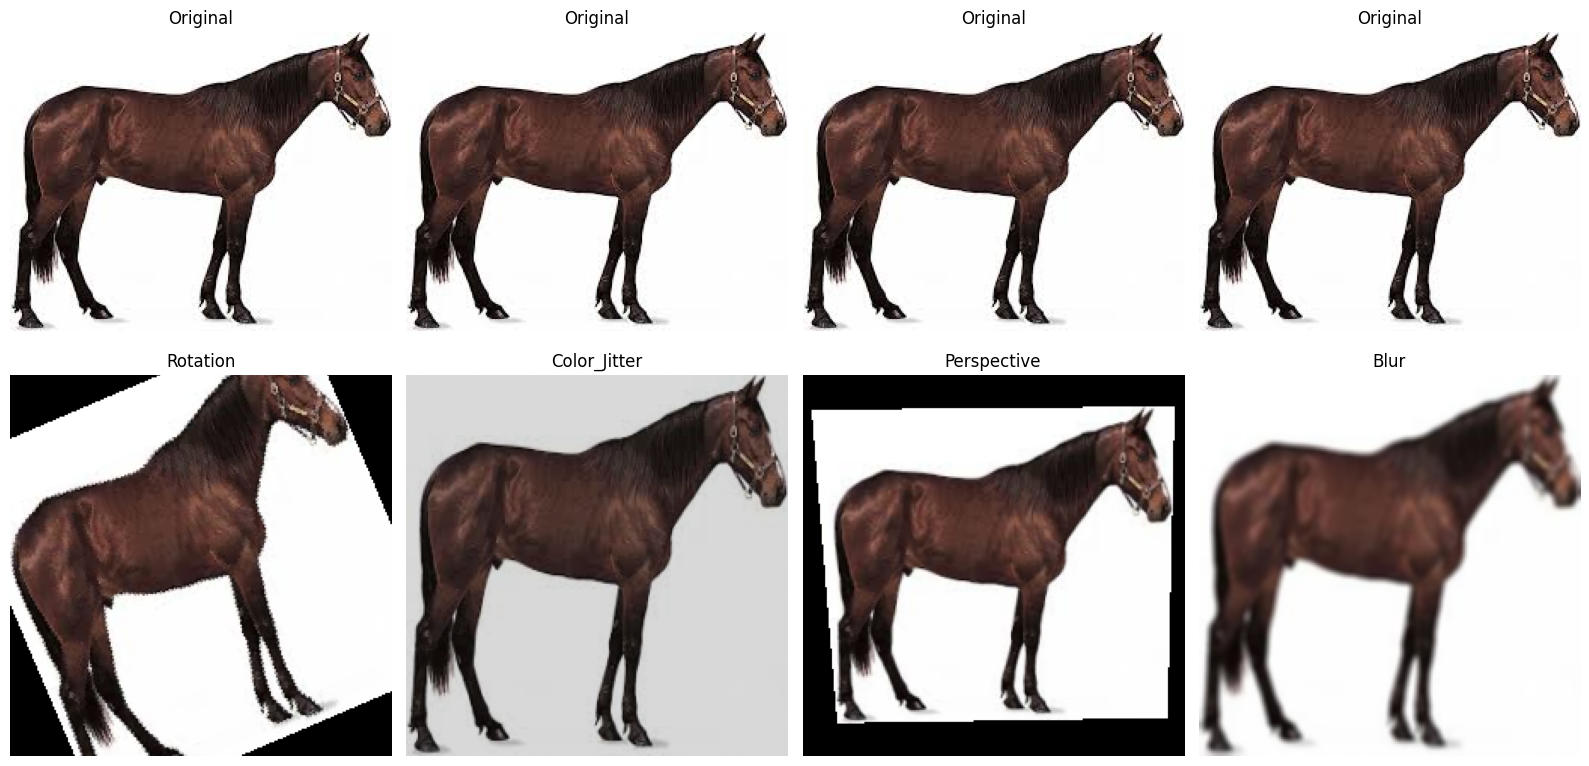

🤔 Discussion Questions:
• Which augmentations preserve the image's meaning?
• Which might be problematic for certain tasks (e.g., text recognition)?
• How might you choose augmentations for a medical imaging task?


In [23]:
# Explore different augmentation techniques
augmentation_examples = {
    'Rotation': transforms.Compose([
        transforms.Resize((224, 224)),
        # TODO: Add rotation transform
        transforms.RandomRotation(degrees=30),  # Try degrees=30
        transforms.ToTensor()
    ]),

    'Color_Jitter': transforms.Compose([
        transforms.Resize((224, 224)),
        # TODO: Add color jitter
        transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3),  # Try 0.3, 0.3, 0.3
        transforms.ToTensor()
    ]),

    'Perspective': transforms.Compose([
        transforms.Resize((224, 224)),
        # TODO: Add perspective transform
        transforms.RandomPerspective(distortion_scale=0.3, p=1.0),  # Try 0.3
        transforms.ToTensor()
    ]),

    'Blur': transforms.Compose([
        transforms.Resize((224, 224)),
        # TODO: Add blur transform
        transforms.GaussianBlur(kernel_size=5),  # Try 5
        transforms.ToTensor()
    ])
}

# TODO: Show multiple augmented versions
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

for i, (name, transform) in enumerate(augmentation_examples.items()):
    # Show original
    axes[0, i].imshow(sample_image)
    axes[0, i].set_title(f'Original')
    axes[0, i].axis('off')

    # Show augmented
    augmented = transform(sample_image)
    axes[1, i].imshow(augmented.permute(1, 2, 0))
    axes[1, i].set_title(f'{name}')
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()

print("🤔 Discussion Questions:")
print("• Which augmentations preserve the image's meaning?")
print("• Which might be problematic for certain tasks (e.g., text recognition)?")
print("• How might you choose augmentations for a medical imaging task?")

## 3. Loading Pre-trained Models

Let's load a pre-trained computer vision model and understand its architecture.

🔍 **RESEARCH TASK 6**:
- What is ResNet and why was it revolutionary?
- What is transfer learning?
- What is ImageNet and why is it important?
- How do CNN architectures differ from the neural networks you built earlier?

In [24]:
# TODO: Load a pre-trained ResNet model
# Hint: Use models.resnet18(pretrained=True) or models.resnet18(weights='DEFAULT')
print("🔄 Loading pre-trained ResNet-18 model...")
model = models.resnet18(weights='DEFAULT')

# TODO: Set model to evaluation mode
# Hint: Use model.eval()
model.eval()

print("✅ ResNet-18 model loaded successfully!")

# Analyze model architecture
print("\n🏗️ Model Architecture Analysis:")
print(f"Model type: {type(model).__name__}")

# TODO: Count parameters
total_params = sum(p.numel() for p in model.parameters())  # sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)  # sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f"Total parameters: {total_params:,}")
print(f"Trainable parameters: {trainable_params:,}")
print(f"Model size: ~{total_params / 1e6:.1f}M parameters")

# TODO: Print model structure
print("\n📋 Model Layers (first few):")
layer_count = 0
for name, module in model.named_modules():
    if layer_count < 10:  # Show first 10 layers
        print(f"{name}: {type(module).__name__}")
        layer_count += 1
print("... (more layers)")

🔄 Loading pre-trained ResNet-18 model...
✅ ResNet-18 model loaded successfully!

🏗️ Model Architecture Analysis:
Model type: ResNet
Total parameters: 11,689,512
Trainable parameters: 11,689,512
Model size: ~11.7M parameters

📋 Model Layers (first few):
: ResNet
conv1: Conv2d
bn1: BatchNorm2d
relu: ReLU
maxpool: MaxPool2d
layer1: Sequential
layer1.0: BasicBlock
layer1.0.conv1: Conv2d
layer1.0.bn1: BatchNorm2d
layer1.0.relu: ReLU
... (more layers)


### Understanding CNN Architecture

🔍 **RESEARCH TASK 7**:
- What is a convolution operation?
- What is pooling and why is it used?
- What are "feature maps" in CNNs?
- How do CNNs achieve translation invariance?

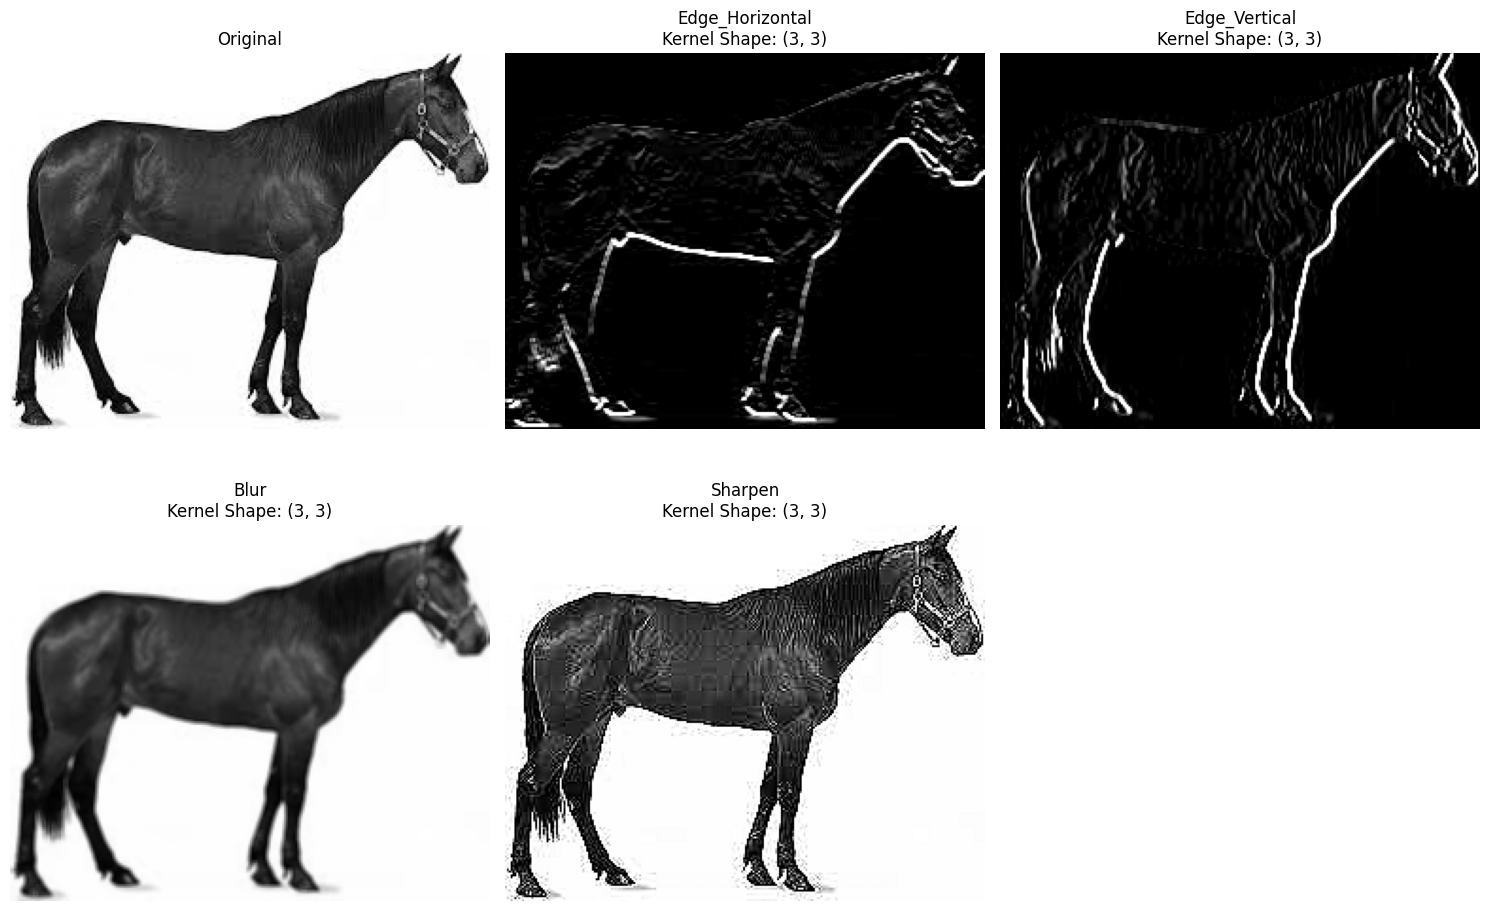

🔍 Convolution Analysis:
• Notice how different kernels detect different features
• CNNs learn these kernels automatically during training
• Deeper layers combine features to detect complex patterns


In [25]:
# Visualize CNN concepts with manual convolution
def visualize_convolution(image, kernel):
    """Apply convolution and visualize the result"""
    # Convert to grayscale if needed
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Apply convolution
    result = cv2.filter2D(image, -1, kernel)
    return result

# Define different convolution kernels
kernels = {
    'Edge_Horizontal': np.array([[-1, -1, -1],
                                [ 0,  0,  0],
                                [ 1,  1,  1]]),

    'Edge_Vertical': np.array([[-1, 0, 1],
                              [-1, 0, 1],
                              [-1, 0, 1]]),

    # TODO: Define a blur kernel
    'Blur': np.array([[1, 1, 1],    # Try 1/9 for each element
                      [1, 1, 1],
                      [1, 1, 1]]) / 9,

    # TODO: Define a sharpen kernel
    'Sharpen': np.array([[ 0, -1,  0],
                        [-1, 5, -1],    # Try 5 for center
                        [ 0, -1,  0]])
}

# Apply kernels to our sample image
gray_sample = cv2.cvtColor(np.array(sample_image), cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(15, 10))

# Original image
plt.subplot(2, 3, 1)
plt.imshow(gray_sample, cmap='gray')
plt.title('Original')
plt.axis('off')

# TODO: Apply each kernel and visualize
for i, (name, kernel) in enumerate(kernels.items(), 2):
    result = visualize_convolution(gray_sample, kernel)

    plt.subplot(2, 3, i)
    plt.imshow(result, cmap='gray')
    plt.title(f'{name}\nKernel Shape: {kernel.shape}')
    plt.axis('off')

plt.tight_layout()
plt.show()

print("🔍 Convolution Analysis:")
print("• Notice how different kernels detect different features")
print("• CNNs learn these kernels automatically during training")
print("• Deeper layers combine features to detect complex patterns")

## 4. Image Classification Pipeline

Let's use our pre-trained model to classify images.

🔍 **RESEARCH TASK 8**:
- What are the 1000 ImageNet classes?
- How do you interpret model confidence scores?
- What is softmax and why is it used for classification?
- How does the model make predictions from features?

📋 Loaded 1000 class labels
First 10 classes: ['tench', 'goldfish', 'great white shark', 'tiger shark', 'hammerhead', 'electric ray', 'stingray', 'cock', 'hen', 'ostrich']

🔍 Testing Image Classification:


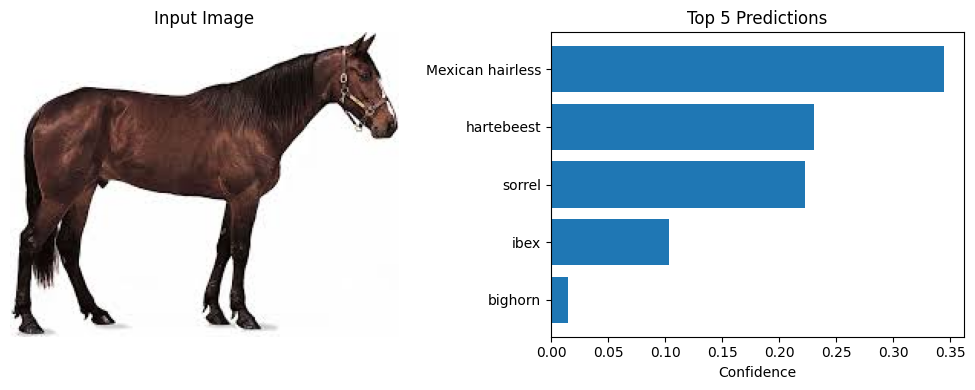


📊 Detailed Results:
1. Mexican hairless               0.3449 (34.49%)
2. hartebeest                     0.2306 (23.06%)
3. sorrel                         0.2224 (22.24%)
4. ibex                           0.1037 (10.37%)
5. bighorn                        0.0148 (1.48%)


In [26]:
# Load ImageNet class labels
def load_imagenet_labels():
    """Load ImageNet class labels"""
    try:
        # Try to load from online
        url = "https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt"
        response = requests.get(url)
        labels = response.text.strip().split('\n')
        return labels
    except:
        # Fallback to some common classes
        return [f"class_{i}" for i in range(1000)]

# TODO: Load the class labels
class_labels = load_imagenet_labels()
print(f"📋 Loaded {len(class_labels)} class labels")
print(f"First 10 classes: {class_labels[:10]}")

# Define preprocessing for classification
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

def classify_image(image, model, labels, top_k=5):
    """
    TODO: Implement image classification function

    Args:
        image: PIL Image or numpy array
        model: Pre-trained model
        labels: List of class labels
        top_k: Number of top predictions to return

    Returns:
        List of (label, confidence) tuples
    """
    # TODO: Preprocess the image
    if isinstance(image, np.ndarray):
        image = Image.fromarray(image)

    input_tensor = preprocess(image)
    input_batch = input_tensor.unsqueeze(0)  # Add batch dimension

    # TODO: Make prediction
    with torch.no_grad():
        outputs = model(input_batch)  # Pass input_batch through model

    # TODO: Apply softmax to get probabilities
    probabilities = torch.nn.functional.softmax(outputs[0], dim=0)  # Use torch.nn.functional.softmax(outputs[0], dim=0)

    # TODO: Get top k predictions
    top_prob, top_indices = torch.topk(probabilities, top_k)  # Use torch.topk(probabilities, top_k)

    # Format results
    results = []
    for i in range(top_k):
        idx = top_indices[i].item()
        prob = top_prob[i].item()
        label = labels[idx] if idx < len(labels) else f"class_{idx}"
        results.append((label, prob))

    return results

# Test classification on our sample image
print("\n🔍 Testing Image Classification:")
predictions = classify_image(sample_image, model, class_labels)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(sample_image)
plt.title('Input Image')
plt.axis('off')

plt.subplot(1, 2, 2)
labels_plot = [pred[0][:20] for pred in predictions]  # Truncate long labels
scores_plot = [pred[1] for pred in predictions]
y_pos = range(len(labels_plot))

plt.barh(y_pos, scores_plot)
plt.yticks(y_pos, labels_plot)
plt.xlabel('Confidence')
plt.title('Top 5 Predictions')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

# TODO: Print detailed results
print("\n📊 Detailed Results:")
for i, (label, conf) in enumerate(predictions, 1):
    print(f"{i}. {label:<30} {conf:.4f} ({conf*100:.2f}%)")

### Testing with Different Images

🔍 **RESEARCH TASK 9**:
- How does model performance vary across different types of images?
- What happens when you input images very different from ImageNet training data?
- How can you tell if a model is confident vs. uncertain?
- What factors affect classification accuracy?

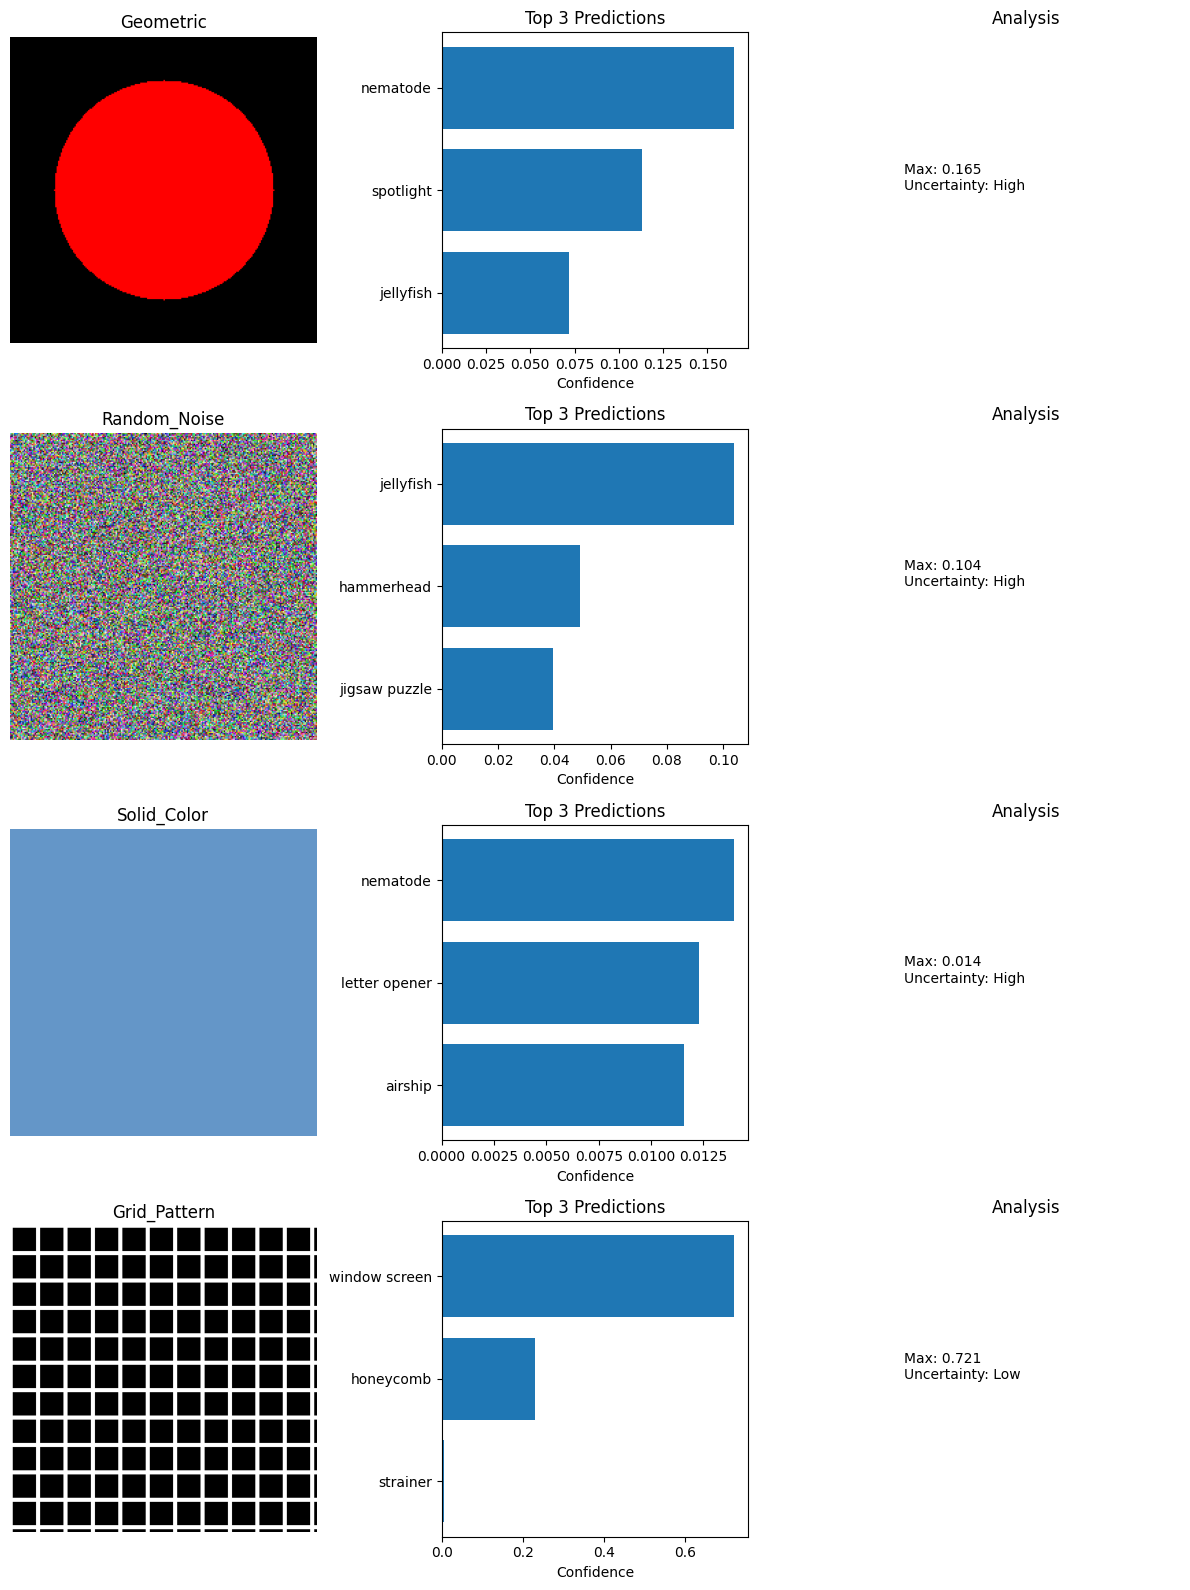


🤔 Analysis Questions:
• Which images had high confidence predictions?
• Which images confused the model?
• What does this tell us about the model's training data?
• How might you improve predictions for unusual images?


In [27]:
# Create test images with different characteristics
def create_test_images():
    """Create various test images to explore model behavior"""
    test_images = {}

    # TODO: Create different types of test images

    # Simple geometric shape
    geometric = np.zeros((224, 224, 3), dtype=np.uint8)
    cv2.circle(geometric, (112, 112), 80, (255, 0, 0), -1)  # Red circle
    test_images['Geometric'] = geometric

    # Random noise
    noise = np.random.randint(0, 256, (224, 224, 3), dtype=np.uint8)
    test_images['Random_Noise'] = noise

    # Solid color
    solid = np.full((224, 224, 3), [100, 150, 200], dtype=np.uint8)
    test_images['Solid_Color'] = solid

    # Simple pattern
    pattern = np.zeros((224, 224, 3), dtype=np.uint8)
    for i in range(0, 224, 20):
        cv2.line(pattern, (i, 0), (i, 224), (255, 255, 255), 2)
        cv2.line(pattern, (0, i), (224, i), (255, 255, 255), 2)
    test_images['Grid_Pattern'] = pattern

    return test_images

# TODO: Generate and test different images
test_images = create_test_images()
n = len(test_images)

plt.figure(figsize=(12, 4 * n))  # height scales with number of rows

for i, (name, image) in enumerate(test_images.items()):
    # 1) Original image
    plt.subplot(n, 3, i*3 + 1)
    plt.imshow(image)
    plt.title(f'{name}')
    plt.axis('off')

    # 2) Top‑3 bar chart
    predictions = classify_image(image, model, class_labels, top_k=3)
    labels_plot = [pred[0][:15] for pred in predictions]
    scores_plot = [pred[1] for pred in predictions]

    plt.subplot(n, 3, i*3 + 2)
    plt.barh(range(len(labels_plot)), scores_plot)
    plt.yticks(range(len(labels_plot)), labels_plot)
    plt.xlabel('Confidence')
    plt.title('Top 3 Predictions')
    plt.gca().invert_yaxis()

    # 3) Confidence analysis
    plt.subplot(n, 3, i*3 + 3)
    max_conf = max(scores_plot)
    conf_text = (
        f"Max: {max_conf:.3f}\n"
        f"Uncertainty: {'High' if max_conf < 0.5 else 'Low'}"
    )
    plt.text(0.1, 0.5, conf_text, fontsize=10, transform=plt.gca().transAxes)
    plt.title('Analysis')
    plt.axis('off')

plt.tight_layout()
plt.show()

print("\n🤔 Analysis Questions:")
print("• Which images had high confidence predictions?")
print("• Which images confused the model?")
print("• What does this tell us about the model's training data?")
print("• How might you improve predictions for unusual images?")

## 5. Feature Visualization

Let's explore what the model "sees" at different layers.

🔍 **RESEARCH TASK 10**:
- What are "feature maps" in CNNs?
- How do features become more complex in deeper layers?
- What is "feature visualization" and why is it useful?
- Research techniques for interpreting CNN decisions

🔍 Extracting features from different layers...
conv1: torch.Size([64, 112, 112])
layer1.0.conv1: torch.Size([64, 56, 56])
layer2.0.conv1: torch.Size([128, 28, 28])
layer4.0.conv1: torch.Size([512, 7, 7])


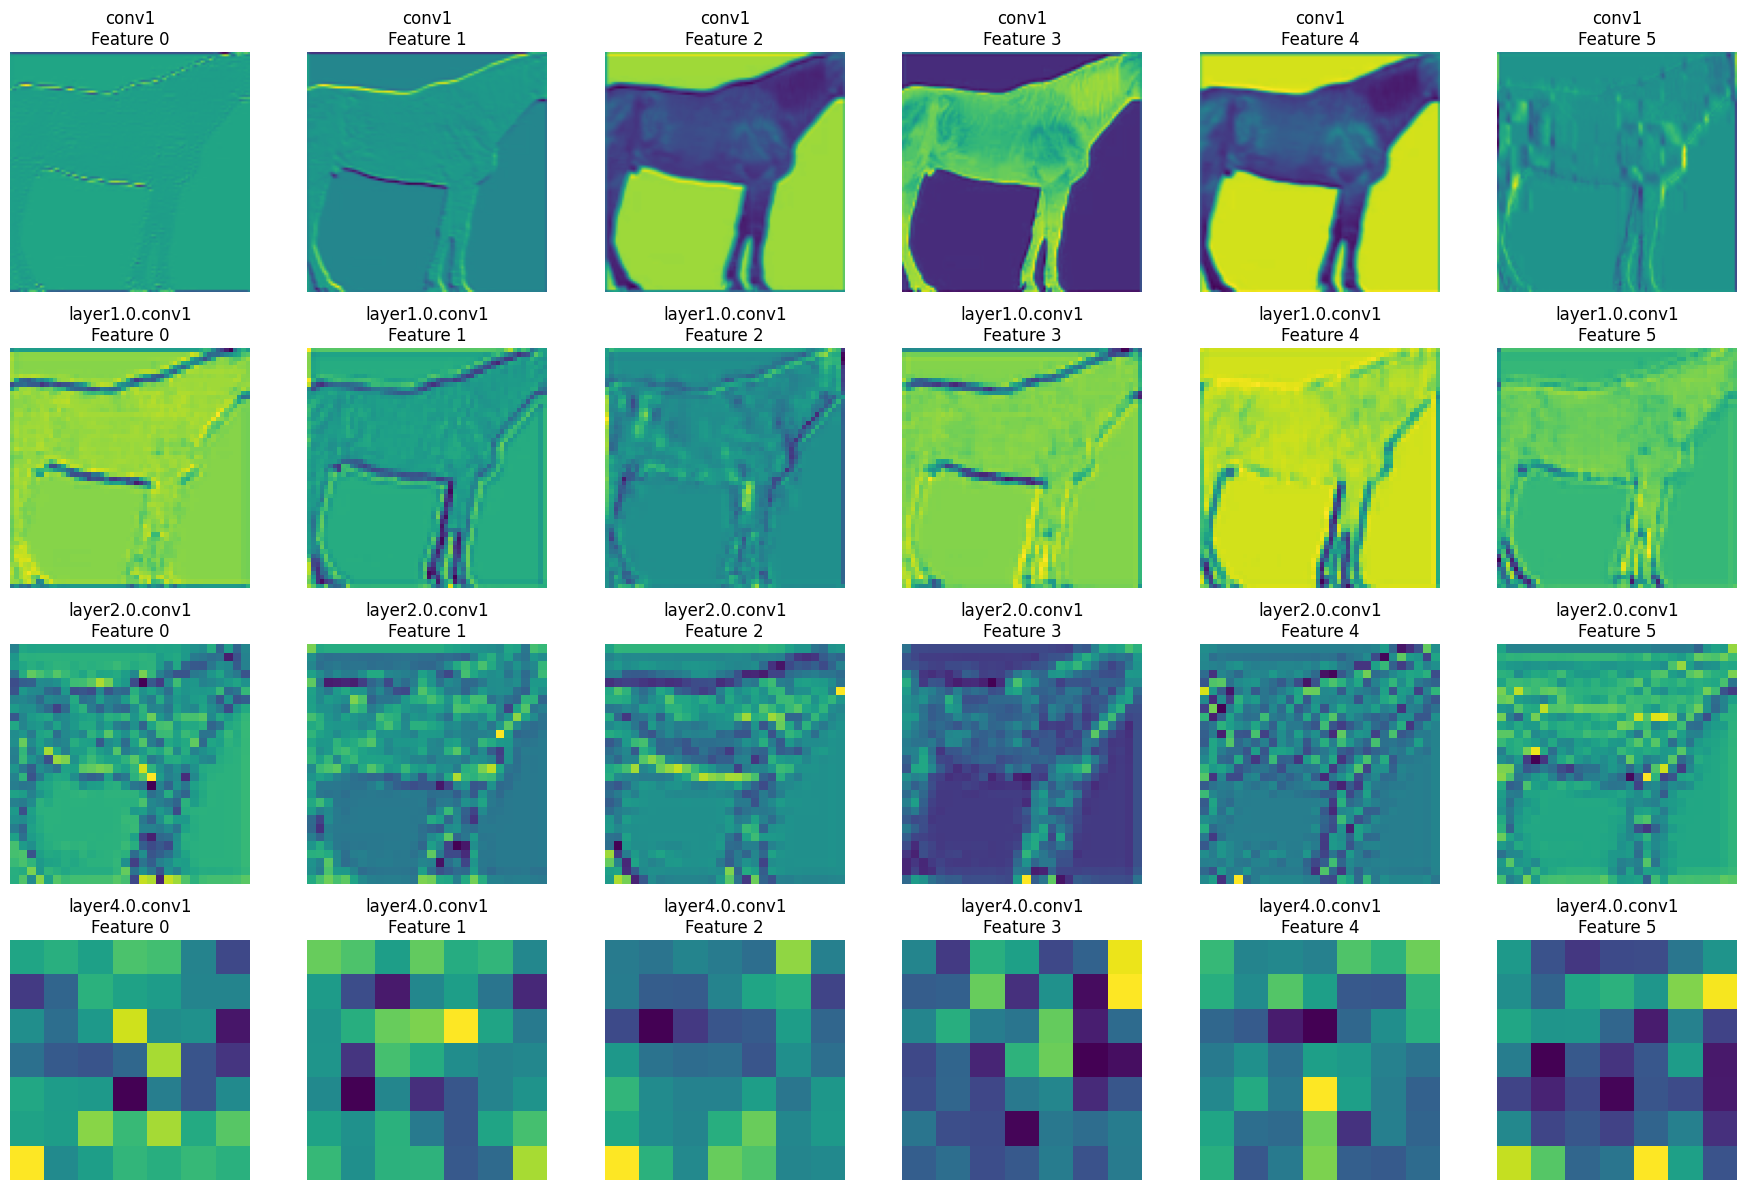


🔍 Feature Analysis:
• Early layers detect edges and simple patterns
• Deeper layers detect more complex features
• Feature maps become smaller but more numerous
• Each feature map responds to different patterns


In [28]:
# Extract features from different layers
def get_features(model, image, layer_names):
    """
    TODO: Extract features from specified layers

    Args:
        model: Pre-trained model
        image: Input image
        layer_names: List of layer names to extract features from

    Returns:
        Dictionary of layer_name -> features
    """
    features = {}

    # TODO: Register hooks to capture intermediate outputs
    def hook_fn(name):
        def hook(module, input, output):
            features[name] = output.detach()
        return hook

    # Register hooks
    hooks = []
    for name, module in model.named_modules():
        if name in layer_names:
            hook = module.register_forward_hook(hook_fn(name))
            hooks.append(hook)

    # TODO: Forward pass
    input_tensor = preprocess(image).unsqueeze(0)
    with torch.no_grad():
        _ = model(input_tensor)

    # Remove hooks
    for hook in hooks:
        hook.remove()

    return features

# TODO: Choose layers to visualize
layers_to_visualize = [
    'conv1',           # First convolution
    'layer1.0.conv1',  # Early ResNet block
    'layer2.0.conv1',  # Middle ResNet block
    'layer4.0.conv1'   # Late ResNet block
]

# Extract features
print("🔍 Extracting features from different layers...")
features = get_features(model, sample_image, layers_to_visualize)

# TODO: Visualize features
fig, axes = plt.subplots(len(layers_to_visualize), 6, figsize=(18, 12))

for i, layer_name in enumerate(layers_to_visualize):
    layer_features = features[layer_name][0]  # Remove batch dimension

    print(f"{layer_name}: {layer_features.shape}")

    # Show first 6 feature maps
    for j in range(min(6, layer_features.shape[0])):
        feature_map = layer_features[j].cpu().numpy()

        axes[i, j].imshow(feature_map, cmap='viridis')
        axes[i, j].set_title(f'{layer_name}\nFeature {j}')
        axes[i, j].axis('off')

plt.tight_layout()
plt.show()

print("\n🔍 Feature Analysis:")
print("• Early layers detect edges and simple patterns")
print("• Deeper layers detect more complex features")
print("• Feature maps become smaller but more numerous")
print("• Each feature map responds to different patterns")

## 6. Building Your Computer Vision Pipeline

Let's create a complete computer vision pipeline.

🔍 **RESEARCH TASK 11**:
- What components make up a complete CV pipeline?
- How do you handle different input formats and sizes?
- What post-processing might be needed?
- How do you evaluate model performance?

In [29]:
class ImageClassificationPipeline:
    """
    TODO: Complete computer vision pipeline
    """

    def __init__(self, model_name='resnet18', confidence_threshold=0.1):
        """Initialize the pipeline"""
        # TODO: Load model and preprocessing
        self.model = models.resnet18(weights='DEFAULT')  # Load the specified model
        self.model.eval()

        self.preprocess = transforms.Compose([
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])

        self.labels = load_imagenet_labels()
        self.confidence_threshold = confidence_threshold

    def predict(self, image, return_all=False):
        """
        TODO: Make prediction on image

        Args:
            image: Input image (PIL, numpy, or file path)
            return_all: Whether to return all predictions or just confident ones

        Returns:
            Dictionary with predictions and metadata
        """
        # TODO: Handle different input types
        if isinstance(image, str):  # File path
            image = Image.open(image).convert("RGB")  # Use Image.open(image)
        elif isinstance(image, np.ndarray):  # Numpy array
            image = Image.fromarray(image).convert("RGB")  # Use Image.fromarray(image)

        # TODO: Get predictions
        predictions = classify_image(image, self.model, self.labels, top_k=5)

        # TODO: Filter by confidence if needed
        if not return_all:
            predictions = [(label, conf) for label, conf in predictions
                          if conf > self.confidence_threshold]

        # TODO: Create result dictionary
        result = {
            'predictions': predictions,
            'top_prediction': predictions[0] if predictions else ('unknown', 0.0),
            'confident': len(predictions) > 0,
            'max_confidence': predictions[0][1] if predictions else 0.0
        }

        return result

    def analyze_image(self, image):
        """
        TODO: Comprehensive image analysis

        Returns detailed analysis including preprocessing effects
        """
        # Original image properties
        if isinstance(image, str):
            image = Image.open(image).convert("RGB")
        elif isinstance(image, np.ndarray):
            image = Image.fromarray(image).convert("RGB")

        original_size = image.size

        # Predictions
        predictions = self.predict(image, return_all=True)

        # TODO: Additional analysis
        analysis = {
            'original_size': original_size,
            'processed_size': (224, 224),
            'predictions': predictions['predictions'],
            'confidence_analysis': {
                'max_confidence': predictions['max_confidence'],
                'uncertainty': 1 - predictions['max_confidence'],
                'confident_predictions': len([p for p in predictions['predictions'] if p[1] > self.confidence_threshold])
            }
        }

        return analysis

# TODO: Test your pipeline
print("🚀 Testing Computer Vision Pipeline:")
pipeline = ImageClassificationPipeline()

# Test with our sample image
result = pipeline.analyze_image(sample_image)

print(f"\n📊 Analysis Results:")
print(f"Original size: {result['original_size']}")
print(f"Processed size: {result['processed_size']}")
print(f"Max confidence: {result['confidence_analysis']['max_confidence']:.4f}")
print(f"Uncertainty: {result['confidence_analysis']['uncertainty']:.4f}")
print(f"\nTop predictions:")
for i, (label, conf) in enumerate(result['predictions'][:3], 1):
    print(f"{i}. {label:<30} {conf:.4f}")

🚀 Testing Computer Vision Pipeline:

📊 Analysis Results:
Original size: (254, 199)
Processed size: (224, 224)
Max confidence: 0.3449
Uncertainty: 0.6551

Top predictions:
1. Mexican hairless               0.3449
2. hartebeest                     0.2306
3. sorrel                         0.2224


## 7. Real-World Applications

Let's explore practical applications of computer vision.

🔍 **RESEARCH TASK 12**:
- What are common computer vision applications in industry?
- How is computer vision used in healthcare, automotive, retail?
- What are the challenges in deploying CV models?
- Research recent breakthroughs in computer vision

In [30]:
# Simulate different real-world scenarios
scenarios = {
    'Medical_Imaging': {
        'description': 'Analyzing medical scans for diagnosis',
        'challenges': ['High accuracy required', 'Limited training data', 'Regulatory approval'],
        'image_type': 'X-ray or MRI simulation'
    },

    'Autonomous_Vehicles': {
        'description': 'Recognizing objects on roads',
        'challenges': ['Real-time processing', 'Weather conditions', 'Safety critical'],
        'image_type': 'Traffic scene simulation'
    },

    'Quality_Control': {
        'description': 'Detecting defects in manufacturing',
        'challenges': ['Subtle defects', 'Industrial environment', 'Speed requirements'],
        'image_type': 'Product inspection simulation'
    },

    'Security_Surveillance': {
        'description': 'Monitoring and threat detection',
        'challenges': ['Privacy concerns', 'Low light conditions', 'Real-time alerts'],
        'image_type': 'Security camera simulation'
    }
}

print("🏭 Real-World Computer Vision Applications:")
print("=" * 60)

for scenario_name, details in scenarios.items():
    print(f"\n📋 {scenario_name.replace('_', ' ')}:")
    print(f"   Description: {details['description']}")
    print(f"   Key Challenges:")
    for challenge in details['challenges']:
        print(f"   • {challenge}")
    print(f"   Typical Input: {details['image_type']}")

# TODO: Create a simple application simulator
def simulate_application(app_type, image):
    """
    TODO: Simulate different application requirements

    Args:
        app_type: Type of application
        image: Input image

    Returns:
        Application-specific analysis
    """
    # Get base predictions
    predictions = pipeline.predict(image, return_all=True)

    if app_type == 'Medical':
        # Medical applications need high confidence
        threshold = 0.9  # Try 0.9
        recommendation = "Approved" if predictions['max_confidence'] > threshold else "Needs Review"

    elif app_type == 'Automotive':
        # Automotive needs fast decisions
        threshold = 0.5  # Try 0.5
        recommendation = "Safe" if predictions['max_confidence'] > threshold else "Alert Driver"

    elif app_type == 'Quality':
        # Quality control looks for defects (unusual predictions)
        threshold = 0.3  # Try 0.3
        recommendation = "Pass" if predictions['max_confidence'] > threshold else "Inspect"

    else:  # Security
        # Security looks for specific threats
        threshold = 0.6  # Try 0.6
        recommendation = "Normal" if predictions['max_confidence'] > threshold else "Investigate"

    return {
        'application': app_type,
        'confidence': predictions['max_confidence'],
        'threshold': threshold,
        'recommendation': recommendation,
        'top_prediction': predictions['top_prediction']
    }

# TODO: Test different applications
print("\n🧪 Application Simulation Results:")
print("=" * 50)

applications = ['Medical', 'Automotive', 'Quality', 'Security']
for app in applications:
    result = simulate_application(app, sample_image)

    print(f"\n{app} Application:")
    print(f"  Confidence: {result['confidence']:.4f}")
    print(f"  Threshold:  {result['threshold']:.4f}")
    print(f"  Decision:   {result['recommendation']}")
    print(f"  Prediction: {result['top_prediction'][0]}")

print("\n🤔 Discussion Questions:")
print("• How do application requirements affect model deployment?")
print("• What are the trade-offs between accuracy and speed?")
print("• How might you handle edge cases in production?")
print("• What additional considerations are needed for each domain?")

🏭 Real-World Computer Vision Applications:

📋 Medical Imaging:
   Description: Analyzing medical scans for diagnosis
   Key Challenges:
   • High accuracy required
   • Limited training data
   • Regulatory approval
   Typical Input: X-ray or MRI simulation

📋 Autonomous Vehicles:
   Description: Recognizing objects on roads
   Key Challenges:
   • Real-time processing
   • Weather conditions
   • Safety critical
   Typical Input: Traffic scene simulation

📋 Quality Control:
   Description: Detecting defects in manufacturing
   Key Challenges:
   • Subtle defects
   • Industrial environment
   • Speed requirements
   Typical Input: Product inspection simulation

📋 Security Surveillance:
   Description: Monitoring and threat detection
   Key Challenges:
   • Privacy concerns
   • Low light conditions
   • Real-time alerts
   Typical Input: Security camera simulation

🧪 Application Simulation Results:

Medical Application:
  Confidence: 0.3449
  Threshold:  0.9000
  Decision:   Needs Rev

## 8. Reflection and Next Steps

### What You've Accomplished
✅ **Understood image representation and preprocessing**
✅ **Explored CNN concepts through hands-on experimentation**
✅ **Used pre-trained models for image classification**
✅ **Built a complete computer vision pipeline**
✅ **Visualized what neural networks "see"**
✅ **Explored real-world applications and challenges**

### Key Insights
🔍 **Discussion Questions**:
- What surprised you most about computer vision?
- How do CNNs compare to the simple neural network you built earlier?
- Which real-world application interests you most?
- What limitations did you notice in the models?

In [31]:
# Final challenge: Design your own computer vision application
print("🎯 FINAL CHALLENGE:")
print("Design your own computer vision application!")
print("=" * 50)

# TODO: Define your application
your_application = {
    'name': 'My CV Application',              # What's your app called?
    'purpose': 'Classify objects in images',           # What problem does it solve?
    'target_users': 'Developers and researchers',      # Who would use it?
    'input_type': 'JPG, PNG, etc.',        # What kind of images?
    'confidence_threshold': 0.7, # What confidence level is needed?
    'speed_requirement': 'Moderate'   # Real-time or batch processing?
}

print(f"📱 Application: {your_application['name']}")
print(f"🎯 Purpose: {your_application['purpose']}")
print(f"👥 Users: {your_application['target_users']}")
print(f"📸 Input: {your_application['input_type']}")
print(f"🎚️ Threshold: {your_application['confidence_threshold']}")
print(f"⚡ Speed: {your_application['speed_requirement']}")

# TODO: Test your application concept
if your_application['confidence_threshold'] != '____':
    custom_pipeline = ImageClassificationPipeline(
        confidence_threshold=your_application['confidence_threshold']
    )

    test_result = custom_pipeline.predict(sample_image)
    print(f"\n🧪 Testing your application:")
    print(f"Confident prediction: {test_result['confident']}")
    print(f"Top result: {test_result['top_prediction'][0]} ({test_result['top_prediction'][1]:.4f})")

print("\n📈 Next Steps for Your Application:")
print("• Collect domain-specific training data")
print("• Fine-tune model for your specific use case")
print("• Design user interface and experience")
print("• Plan deployment and scaling strategy")
print("• Consider ethical implications and bias")

print("\n🚀 Prepare for Day 2:")
print("Tomorrow we'll dive deeper into:")
print("• Fine-tuning pre-trained models")
print("• Building custom datasets")
print("• Transfer learning techniques")
print("• Deploying CV models in production")

🎯 FINAL CHALLENGE:
Design your own computer vision application!
📱 Application: My CV Application
🎯 Purpose: Classify objects in images
👥 Users: Developers and researchers
📸 Input: JPG, PNG, etc.
🎚️ Threshold: 0.7
⚡ Speed: Moderate

🧪 Testing your application:
Confident prediction: False
Top result: unknown (0.0000)

📈 Next Steps for Your Application:
• Collect domain-specific training data
• Fine-tune model for your specific use case
• Design user interface and experience
• Plan deployment and scaling strategy
• Consider ethical implications and bias

🚀 Prepare for Day 2:
Tomorrow we'll dive deeper into:
• Fine-tuning pre-trained models
• Building custom datasets
• Transfer learning techniques
• Deploying CV models in production


## 🎉 Congratulations!

You've successfully:
- ✅ Mastered image preprocessing and data representation
- ✅ Understood CNN architecture and convolution concepts
- ✅ Used state-of-the-art pre-trained models
- ✅ Built a complete computer vision pipeline
- ✅ Visualized neural network features and decision-making
- ✅ Explored real-world applications and challenges
- ✅ Designed your own CV application concept

### Day 1 Complete! 🚀
You've now experienced both major branches of modern AI:
- **Natural Language Processing** (text generation with GPT-2)
- **Computer Vision** (image classification with ResNet)

**Share with your partner**: What connection do you see between text and image processing?

---
*Day 1 Complete - Ready for Advanced Topics! 🌟*